In [95]:
from numpy.testing import assert_equal, assert_almost_equal

# Quiz 2: Linear Models and SVM [20 pts]

In this quiz, you will be working on the **Reported COVID19 Cases** of selected municipalities in the Philippines. This dataset is attached along with this notebook as `covid19ph.csv`. The attributes of the dataset are as follows:

**Descriptive Features**

1. `householdIncome`: Average household income of surveyed participants annually in PhP.
2. `gdp`: reported GDP per capita of Municipality in PhP.
3. `malePercent`: Percentage of male population
4. `population`: Actual population
5. `area`: Area in km<sup>2</sup> of the boundary
6. `populationDensity`: Population/Area
7. `age`: Average age of surveyed participants
8. `firstCaseDays`: Number of days from 01 January 2020 when first COVID19 positive was reported
9. `hospitalCapacity`: Percent of hospital available to treat/admit COVID19 patients
10. `workingPopulationPercent`: Percent of working population
11. `partyAffiliationPercent`: Party affiliation in percent of leaders in the government who are affiliated with the current administration
12. `daysECQ`: Number of days in Enhanced Community Quarantine (ECQ) or Modified ECQ (MECQ).
13. `daysGCQ`: Number of days in General Community Quarantine (GCQ) or Modified GCQ (MGCQ).

**Target Features**

14. `reportedIncidents`: Number of confirmed COVID19 positive per 100,000 population
15. `reportedIncidentsHighLow`: value is `1` if `reportedIncidents` > 300 per 100k population. Else, the value is `0`.

In **Problem 1** you will use `Lasso` regression to identify important features on the dataset, while in **Problem 2** you will be asked to build a model using `Logistic` and `LinearSVC` with `L2` regularizations.

*Note: some parts of this quiz will be autograded! Be sure to follow the instructions in each task carefully and that your notebooks run from top to bottom!*

## Problem 1 Lasso Regression

In this problem, we will use `Lasso` regression to identify the features that has the most impact on our model. Afterwards, we proceed to interpret the results and make sense of it!

We first read and perform preprocessing on our dataset

In [96]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read the dataset
data = pd.read_csv('covid19ph.csv')

# Get the descriptive and target features
predictors = data.iloc[:, :-2]
regression_target = data.iloc[:, -2]
classification_target = data.iloc[:, -1]
feature_names = np.array(predictors.columns)

# Perform standard scaling on the predictors
## Initialize scaler
scaler = StandardScaler()
scaler.fit(predictors)

# Perform scaling
scaled_predictors = scaler.transform(predictors)

### Task 1 Instantiation [1 pt]

Instantiate a `Lasso` regressor model with parameters `alpha` as 10, and `random_state` as `1337`. Leave all other parameters in their default setting. Place this `Lasso` regressor in the `model` variable.

In [97]:
from sklearn.linear_model import Lasso



model = Lasso(alpha=10, random_state=1337)

# YOUR CODE HERE
model

Lasso(alpha=10, random_state=1337)

In [98]:
# Lasso?

In [99]:
assert model is not None, "Place the Lasso regressor model on this variable"

### Task 2 Model Fitting [1 pt]

Train the `model` to predict the number of reported incidents using the standard scaled descriptive features of the dataset. No need to split the data into train and test dataset.

Compute for the $R^2$ predictions of the model for each of the instances in the dataset, place the value of this in the variable `r2_value`.

In [100]:
r2_value = None

# YOUR CODE HERE
fitted_model = model.fit(scaled_predictors, regression_target)
r2_value = fitted_model.score(scaled_predictors, regression_target)
r2_value

0.9259071160928378

In [101]:
# fitted_model.score?

In [102]:
assert r2_value is not None, "Place the r2 score on this variable"

### Task 3 Interpretation

Our model is now trained and is ready for interpretation.

#### Task 3a Model Coefficients [2 pt]

Get the coefficients of the trained `Lasso` regressor, then saved it in the `model_coefficients` variable. Don't take its absolute value yet!

In [103]:
fitted_model.coef_

array([ 0.        ,  0.        ,  6.88343502,  0.        , -0.        ,
        1.36844487, -0.        , -5.79412273,  0.        , 11.09298867,
       -0.        , 39.16421494, 66.95681669])

In [104]:
model_coefficients = fitted_model.coef_
model_coefficients

array([ 0.        ,  0.        ,  6.88343502,  0.        , -0.        ,
        1.36844487, -0.        , -5.79412273,  0.        , 11.09298867,
       -0.        , 39.16421494, 66.95681669])

In [105]:
assert model_coefficients is not None, "Place the coefficients here"

Plot the `model_coefficients` as a horizontal bar plot with the y-axis as the `feature_name`.

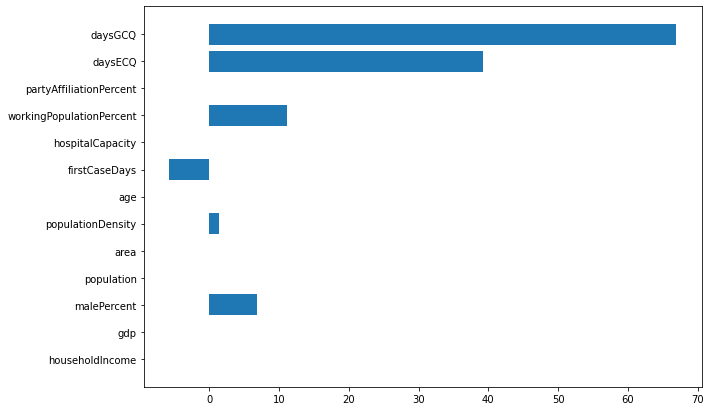

In [106]:
import matplotlib.pyplot as plt

# weights_normalized= fitted_model.coef_.T/np.sum(np.abs(fitted_model.coef_.T))

fig = plt.figure(figsize=(10, 7))
plt.barh(feature_names, model_coefficients, align='center')
# plt.yticks(feature_names)
plt.show()

#### Task 3b Most impactful features [2 pts]

Now, take the absolute value of the model coefficients, save this array onto the `model_coefficients_abs` variable.

In [107]:
model_coefficients_abs = np.abs(model_coefficients)

# YOUR CODE HERE
model_coefficients_abs

array([ 0.        ,  0.        ,  6.88343502,  0.        ,  0.        ,
        1.36844487,  0.        ,  5.79412273,  0.        , 11.09298867,
        0.        , 39.16421494, 66.95681669])

In [108]:
assert model_coefficients_abs is not None, "Place the abs coefficients here"

Generate a horizontal bar plot showing the feature names as the y-axis and the absolute value of the coefficients as the x-axis.

*Next level play: Sort the y-axis of the plot according to increasing absolute coefficient value (highest value should be on the top of the plot, lowest value should lie on the bottom).*

In [109]:
# YOUR CODE HERE
sorted_ = sorted(list(enumerate(model_coefficients_abs)), key=lambda x: x[1])
sorted_

[(0, 0.0),
 (1, 0.0),
 (3, 0.0),
 (4, 0.0),
 (6, 0.0),
 (8, 0.0),
 (10, 0.0),
 (5, 1.368444869039042),
 (7, 5.794122728560324),
 (2, 6.883435016561234),
 (9, 11.092988667870339),
 (11, 39.16421494030522),
 (12, 66.95681668799521)]

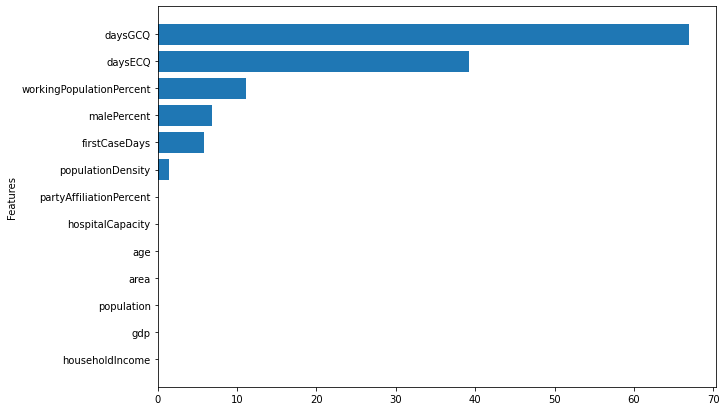

In [110]:
fig = plt.figure(figsize=(10, 7))
plt.barh([feature_names[i[0]] for i in sorted_], [i[1] for i in sorted_])
plt.ylabel("Features")
plt.show()

#### Task 3c Insights [2 pts]

Give three insights that you can observe from the results.

YOUR ANSWER HERE
 - The number of days in GCQ or ECQ greatly contributes positively to the number of positive cases per population. Although this may seem strange, it maybe because the surge in covid 19 cases that are realized are the ones that were contracted weeks ago before the quarantine has been placed.
 
 - aside from the days in GCQ or ECQ the next contributor is the working population percent variable. This one makes sense because the more people who are working, the more people tend to go outside, the more they are at risk of covid19 transmission. 
 
 - One might also think that house hold income may also contribute to the covid19 cases, but the model deemed it as irrelevant. It shows that covid19 affects all socio-economic classes.
 

## Problem 2 Logistic and Support Vector Machines

In this problem, we will use the same *scaled* descriptive features from the previous problem and train a `Logistic` and `Linear SVM` using `L2` regularization to predict whether a certain municipality has high or low reported cases count.

In [111]:
# Import models to be used
from sklearn.base import clone
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

# Import model selection method
from sklearn.model_selection import KFold

### Task 1 Model Experimentation [8 pts]

Perform training and testing of a `Logistic (L2)`, and `Linear SVC (L2)` model using an `8`-fold cross validation. Use the scaled descriptive features (stored as `scaled_predictors`) as your input features and the `reportedIncidentsHighLow` (stored as `classification_target`) as your target features.

**Experimentation Settings:**
1. Set the `shuffle` setting of your `KFold` cross-validator to be `False`.
2. Iterate the `C` hyperparameter for along the given `C_range`
3. Use random state `1337` for all of your models.
4. For each hyperparameter setting of your models, get the **average value** of the train and test accuracy across all splits then save them on their respective initialized lists below.

In [112]:
# Hyperparameter range
C_range = np.logspace(-8, 8, 20)

# Initialize simulation results
logistic_train_accuracy = []
logistic_test_accuracy = []
svc_train_accuracy = []
svc_test_accuracy = []

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
kf = KFold(n_splits=8, shuffle=False)

for c in C_range:
    train_acc_split = []
    test_acc_split = []
    for train_index, test_index in kf.split(scaled_predictors):
        X_train, X_test = scaled_predictors[train_index], scaled_predictors[test_index]
        y_train, y_test = classification_target[train_index], classification_target[test_index]
        
        lr_l2 = LogisticRegression(penalty="l2",C=c).fit(X_train, y_train)
        train_acc_split.append(lr_l2.score(X_train, y_train))
        test_acc_split.append(lr_l2.score(X_test, y_test))
    logistic_train_accuracy.append(np.array(train_acc_split).mean())
    logistic_test_accuracy.append(np.array(test_acc_split).mean())

In [114]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
kf = KFold(n_splits=8, shuffle=False)

for c in C_range:
    train_acc_split = []
    test_acc_split = []
    for train_index, test_index in kf.split(scaled_predictors):
        X_train, X_test = scaled_predictors[train_index], scaled_predictors[test_index]
        y_train, y_test = classification_target[train_index], classification_target[test_index]
        
        svc_l2 = LinearSVC(penalty="l2",C=c).fit(X_train, y_train)
        train_acc_split.append(svc_l2.score(X_train, y_train))
        test_acc_split.append(svc_l2.score(X_test, y_test))
    svc_train_accuracy.append(np.array(train_acc_split).mean())
    svc_test_accuracy.append(np.array(test_acc_split).mean())

In [115]:
svc_test_accuracy

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.984375,
 0.984375,
 0.984375,
 0.984375,
 0.96875,
 0.953125,
 0.953125,
 0.953125,
 0.953125,
 0.953125,
 0.953125,
 0.953125,
 0.953125,
 0.953125]

In [116]:
assert len(logistic_train_accuracy) == 20
assert len(logistic_test_accuracy) == 20
assert len(svc_train_accuracy) == 20
assert len(svc_test_accuracy) == 20

### Task 2 Evaluation of Results

#### Task 2a [2 pts]
Plot the train and test accuracy versus the hyperparameter setting `C` for each model in their own separate subplots. Show the legend and set the log scale for the `x-axis`. [2 pts]

*Hint: To set the x-scale of the plot to logarithm, first, get the current axes of the plot `ax = plt.gca()`, then invoke the matplotlib axes method `ax.set_xscale('log')`.*

No handles with labels found to put in legend.


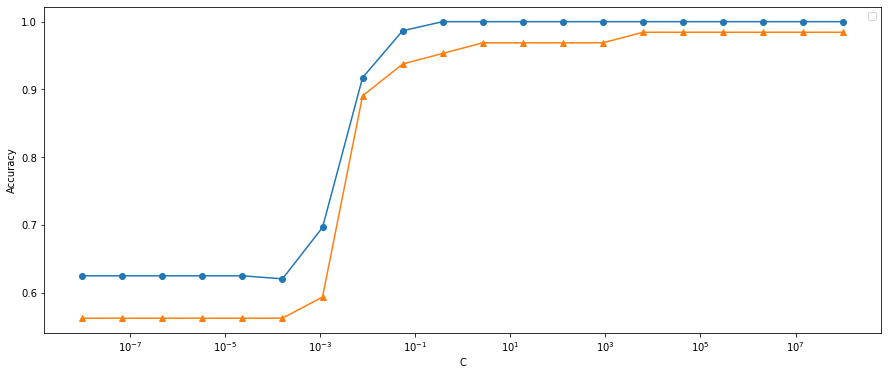

In [117]:
# YOUR CODE HERE
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.plot(C_range, logistic_train_accuracy, marker='o')
plt.plot(C_range, logistic_test_accuracy, marker='^')
plt.ylabel("Accuracy")
plt.xlabel("C")
#plt.ylim(.7,1)
plt.legend()

No handles with labels found to put in legend.


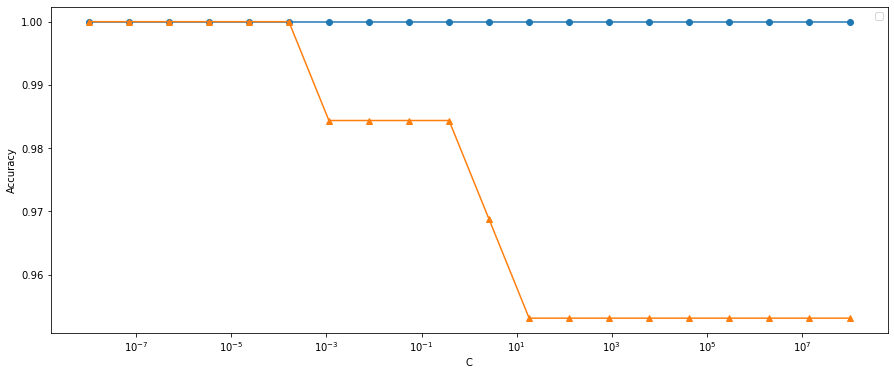

In [118]:
# YOUR CODE HERE
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.plot(C_range, svc_train_accuracy, marker='o')
plt.plot(C_range, svc_test_accuracy, marker='^')
plt.ylabel("Accuracy")
plt.xlabel("C")
#plt.ylim(.7,1)
plt.legend()

#### Task 2b Model Selection [2 pts]
Which model will you use? Why?

I would choose SVM because it gave the overall best test accuracy

In [119]:
np.array(logistic_test_accuracy).max()

0.984375

In [120]:
np.array(svc_test_accuracy).max()

1.0

## BONUS [1 pt]
What modifications and/or procedures on the dataset or experimentation procedure will you do to improve the performance and evaluation of the model?

YOUR ANSWER HERE

I would standardize after the splitting of test and train.